<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/6_3_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principal Component Analysis) - 주성분 분석

먼저 ```차원``` 이라는 용어부터 정리하고 가자.

차원이란?

> 1) 데이터가 가진 속성 (e.g., 길이, 무게, 밀도)

> 2) 데이터를 이루는 '축' (e.g., (10, 10000) 은 10000개의 차원을 가진 10개 샘플 데이터)

여기서 대표적인 차원축소 알고리즘인 PCA를 공부하는데 2)에 해당하는 공부라고 볼 수 있다.

차원축소를 하는 이유는, 주성분 분석을 하여 데이터를 이루는 주요한 특성들만 추려 학습할 수 있고 이는 저장공간의 효율성을 높이는 효과가 있다.

x1, x2라는 두 개의 특성을 갖는 훈련데이터를 시각화하였을 때, 분산(데이터가 널리 퍼져있는 정도)이 큰 방향을 데이터를 잘 표현하는 벡터라고 생각할 수 있다.

일반적으로 이런 벡터를 '주성분(principal component)'이라고 하며, '원본'데이터 특성의 개수와 동일한 개수를 추출할 수 있다.

In [1]:
# PCA 클래스

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-09-06 01:22:07--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-09-06 01:22:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-09-06 01:22:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
# sklearn.decomposition 모듈에 PCA 클래스로 주성분 분석 알고리즘 존재.
# PCA 클래스 객체 생성시 n_components 로 주성분 개수를 지정해야 함.
# k-평균과 마찬가지로 비지도 학습이기 때문에 fit()에 타깃값을 전달하지 않음.

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# PCA 가 찾은 주 성분은 components_ 속성에 저장되어있다.
print(pca.components_)
print(pca.components_.shape)

[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701610e-05 -1.13551049e-05 -1.82152559e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220484e-05 -2.08401751e-05 -2.89870144e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.16931099e-05 -4.25587769e-05 -2.79576273e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.76607283e-06  1.17737296e-04  1.50481119e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 7.49078591e-05 -2.81687276e-05  1.58085393e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(50, 10000)


In [6]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) # n: sample개수
  # 한 줄에 10장씩 이미지를 그린다. 
  rows = int(np.ceil(n/10))
  # 행이 1개면 열의 개수는 샘플 개수다. 그렇지 않으면 10개다.
  cols = n if rows < 2 else 10
  
  # figsize : 가로, 세로 사이즈 지정.
  # squeeze : False로 할 경우 axs로 반환되는 2개 원소를 갖는 Arr가 (1, 2)같을경우 (2,) 이렇게
  # 차원축소를 하지 않고 그대로 (1, 2)로 반환한다. 2d 배열 인덱싱을 위해서 False로 함.
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

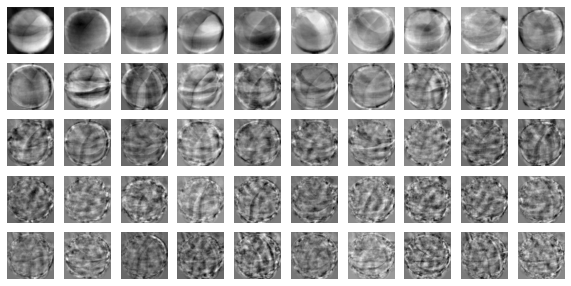

In [8]:
# components_의 첫 번째 차원은 PCA 모델이 지정한 50개 주성분이고,
# 두 번째 차원은 10000개의 원본 데이터 특성개수다.

# 원본 데이터와 차원이 같으므로 주성분을 100 X 100 크기의 이미지처럼 출력해볼 수 있다.
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
# 이 50개의 주성분은 원본 데이터에서 가장 분산이 큰 방향을 '순서대로' 나타낸 것이다.
# 주성분을 찾았으므로 10000개 특성으로 이루어진 원본 데이터를 주성분에 투영하여
# 차원의 개수를 10000개에서 50개로 줄일 수 있다.

# 이는 마치 원본 데이터를 각 주성분으로 '분해'하는 것으로 생각할 수 있다.
# PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50개로 줄여보자

# 원본 데이터
print(fruits_2d.shape)

# PCA 데이터로 차원축소. -> PCA.transform()
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [12]:
# 데이터의 차원을 축소하였다.
# 이 과정에서 손실이 발생했겠지만, 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당부분 재구성 할 수 있다.

# 데이터의 재구성을 어떻게 할 수 있을까?
# PCA 클래스는 inverse_transform()를 제공하는데 transform()과 반대성격의 메서드다.
# 차원 축소된 것을 복원하는 것이다.

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


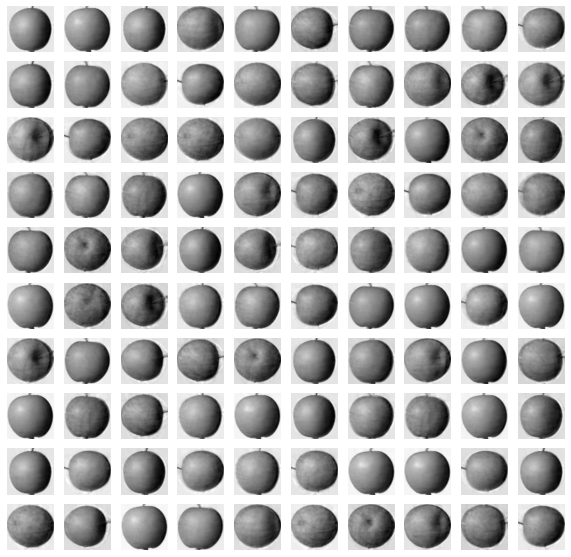

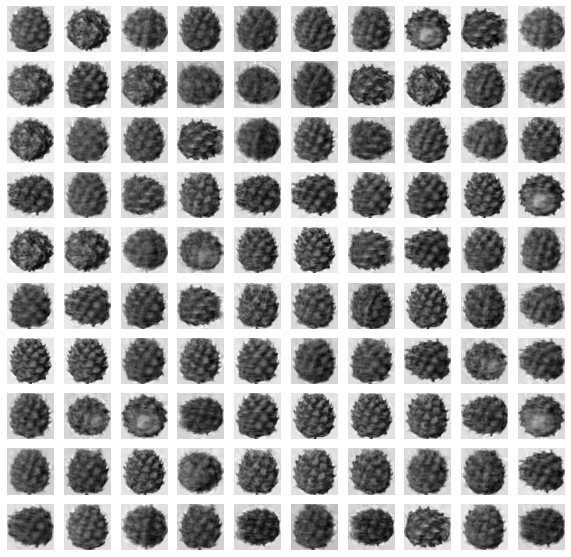

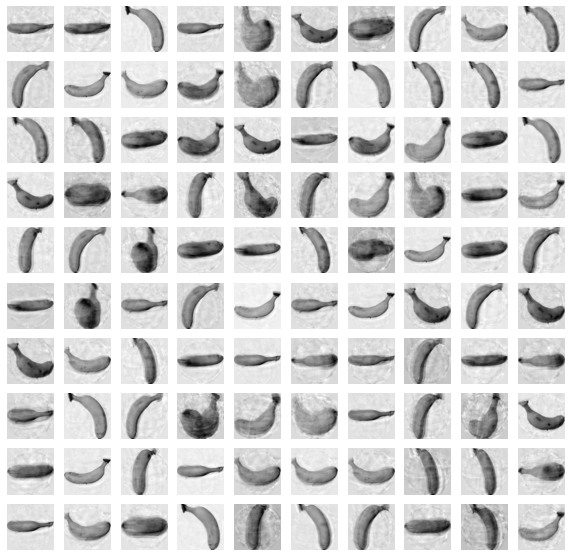

In [14]:
# 예상대로 10000개의 특성이 복원되었다.
# 이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력해보자.

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
# 거의 모든 과일이 잘 복원되었다.
# 50개의 특성을 10000개로 복원시킨 것을 감안하면 50개의 특성이 분산을 가장 잘 보존하도록 사용된 특성임을 알 수 있다.
# 그럼 이 50개의 특성은 얼마나 분산을 보존하고 있는 것일까?

# 설명된 분산 (Explained variance)

> 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 ```설명된 분산(explained variance)``` 라고 한다.

PCA 클래스의 ```explained_variance_ratio_``` 에 각 주성분의 설명된 분산 비율이 기록되어 있다.

첫 번째 주성분 일수록 설명된 분산이 가장 크다.

이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 계산할 수 있다.

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9214200166256159


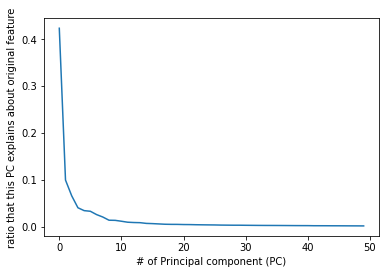

In [18]:
# 50개의 주성분은 10000개의 특성의 분산 대비 92% 가 넘는 분산을 유지하고 있는 것을 알 수 있다.
# 앞서 50개의 특성에서 원본 데이터로 복원했을 때 원본 이미지 품질이 좋았던 이유가 여기있다.

# 설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 된다.
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# of Principal component (PC)')
plt.ylabel('ratio that this PC explains about original feature')
plt.show()

In [17]:
# [해석]
# 그래프를 보면 50개 중 처음 10개의 주성분이 원본데이터의 분산 대부분을 표현하고 있는 것을 알 수 있다.
# 10번째 이후 주성분은 원본데이터의 분산을 거의 설명하지 않는다고 볼 수 있다.

# 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 어떤 차이가 있는지 살펴보자.

3개의 과일 사진을 분류해야 하므로, 간단히 '로지스틱 회귀'모델을 사용한다.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 당연하지만 지도학습모델을 사용하려면 타깃값이 있어야 한다.
# 여기서는 사과를 0, 파인애플을 1, 바나나를 2로 지정한다.

target = np.array([0]*100+[1]*100+[2]*100)

# 먼저 원본 데이터 (fruits_2d) 를 사용해보자.
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)

# 교차검증점수 (각 검증세트평가 평균)
print(np.mean(scores['test_score']))
# 훈련시간 평균
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1702229499816894


In [20]:
# 교차 검증의 점수는 0.997로 매우 높다.
# 그러나 특성이 10000개나 되기 때문에 300개의 샘플에 대해서는 금방 과대적합된 모델을 만들기 쉽다.

# [참고]
# cross_validate() 가 반환하는 딕셔너리에는 fit_time 항목으로 각 교차 검증 폴드의 훈련시간이 기록되어 있다.

# 그럼 PCA로 축소한 fruits_pca 를 사용했을 때와 비교해보자.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02832345962524414


In [21]:
# 50개의 특성만 사용했는데도 불구하고 정확도가 100%이고, 훈련 시간은 0.02초로 1.17초 걸리던 것 대비해서 매우 단축되었다.

# !!! 이렇듯, PCA로 훈련 데이터의 차원을 축소하면 저장 공간을 축소시키는 동시에 머신러닝 모델의 훈련 속도도 높일 수 있다.

# 앞서 PCA 클래스를 사용할 때 n_components_ 매개변수에 주성분의 개수를 지정했다.
# 이 대신 원하는 설명된 분산 비율을 입력할 수도 있다.
# PCA 클래스는 지정된 비율에 도달할 때 까지 자동으로 주성분을 찾는다.

# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어보자.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [22]:
print(pca.n_components_)

2


In [23]:
# 원본 데이터에 있는 분산의 50%를 표현하려면 주성분 2개가 필요하다는 걸 알 수 있다.
# 이 모델로 원본 데이터를 변환해보자.
# (300, 10000) -> (300, 2)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [24]:
# 2개의 특성만 사용하여도 교차 검증의 결과가 좋을까?
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.040774202346801756


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [27]:
# 10000개 가 아닌 2 개의 특성만 사용하였는데도 99% 성능을 보이는 걸 알 수 있다.

# 이번에는 차원축소된 데이터를 갖고 k-평균 알고리즘으로 클러스터를 찾아보자.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


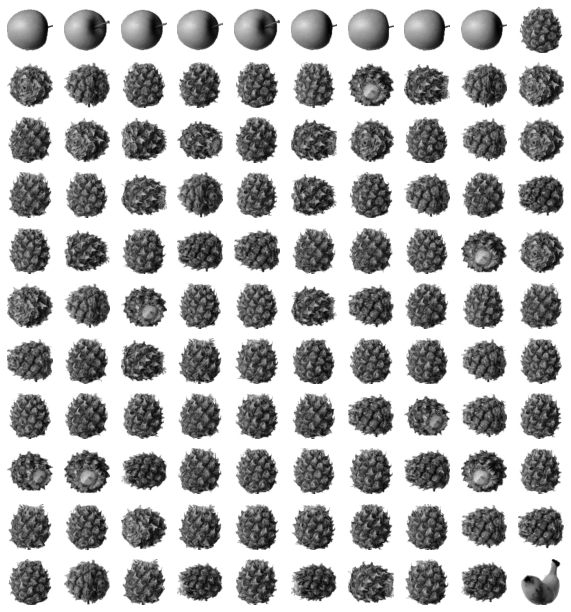

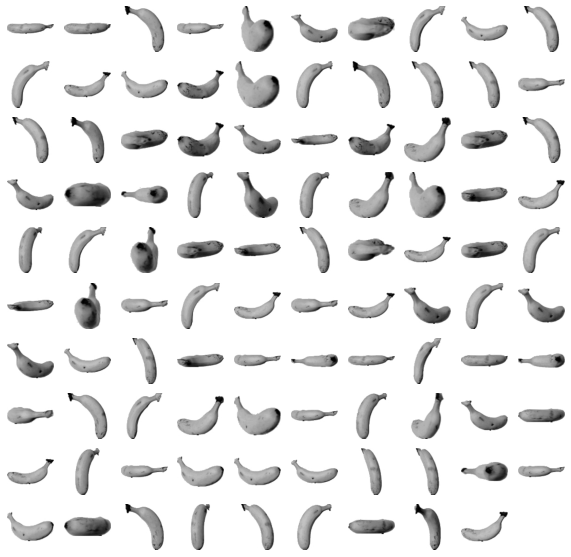

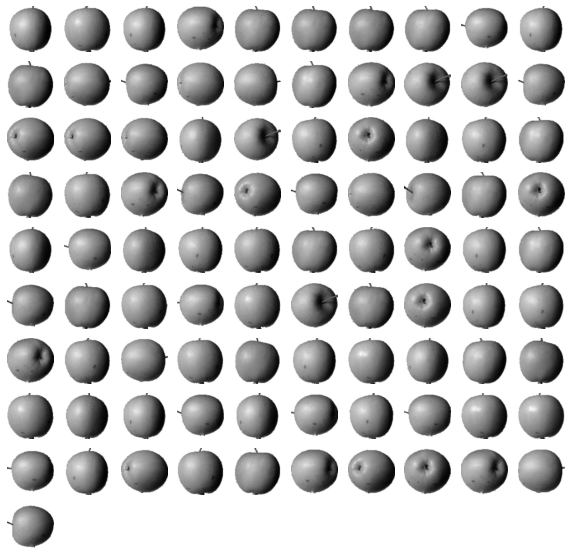

In [28]:
# fruits_pca로 찾은 클러스터는 각각 110, 99, 91개 샘플을 포함하고 있다.
# KMeans가 찾은 레이블을 사용해 과일이미지를 출력해보자

for label in range(0, 3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

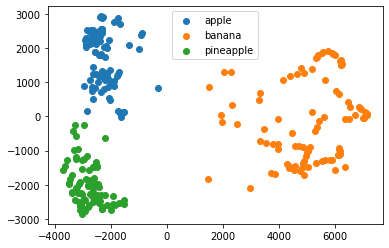

In [29]:
# 2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼돈되는 측면이 있다.
# 몇 개의 사과가 파인애플 클러스터에 포함되어있는걸 확인할 수 있다.

# 차원 축소의 또 다른 장점은 '시각화'이다.
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.

# fruits_pca 에는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다.
# 앞에서 찾은 km.lables_ 를 사용해 클러스터별로 산점도를 그려보자.

for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [30]:
# 특성 2개의 PCA를 거친 뒤 각 클러스터의 산점도가 아주 잘 구분되는 걸 알 수 있다.
# 특성을 2개만 사용해도 로지스틱회귀에서 99%의 교차검증점수를 달성한 이유를 알 수 있다.

# 사과와 파인애플 클러스터 경계가 가깝게 붙어있는데 이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬울 것 같다.
# 데이터를 시각화하면 이렇게 예상치 못한 통찰을 얻을 수 있다.
# 따라서, 차원 축소는 매우 유용한 도구 중 하나다.